# Qubit Calibration

Qubits are used to calibrate the system.

Physics is based heavily on https://www.science.org/doi/full/10.1126/science.1181918

and also  https://journals.aps.org/prapplied/abstract/10.1103/PhysRevApplied.13.024066

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import datetime
#jupyter notebook --notebook-dir=c:\xampp\htdocs\quantumswitch

$$r = r_0\frac{1 + i\delta\omega/\Gamma_2}{1 + (\delta\omega/\Gamma_2)^2 + \Omega^2/\Gamma_1\Gamma_2}$$

$r_0 = \frac{\eta\Gamma_1}{2\Gamma_2},$ is the amplitude at $\delta\omega = 0$, $\eta$ is a dimensionless coupling to the field.

Or, from the second reference,

$$
r = \frac{\Gamma_1}{2\Gamma_2}\frac{1 + i\delta\omega/\Gamma_2}{1 + (\delta\omega/\Gamma_2)^2 + \Omega^2/\Gamma_1\Gamma_2}
$$

And use reference [2](https://journals.aps.org/prapplied/abstract/10.1103/PhysRevApplied.13.024066) to choose values for our plots here:



$$
\omega_0/2\pi = 6.83 \textrm{ GHz}
$$

$$
\Gamma_1/2\pi = 8.2 \textrm{ MHz}
$$

$$
\Gamma_2/2\pi = 5.7 \textrm{ MHz}
$$


$$
W_0  = \hbar\omega\Omega^2/(2\Gamma_1) = P
$$

$$
\Omega^2  = \frac{2\Gamma_1}{hf}P,
$$


$$
\Omega^2/\Gamma_1\Gamma_2 = \frac{2}{hf\Gamma_2}
$$

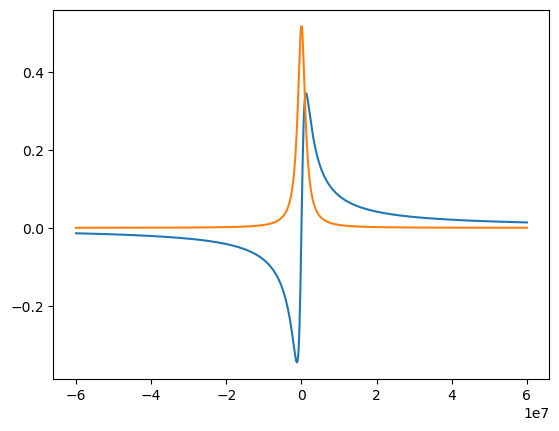

In [2]:
f = 6.83e9
Gamma1 = 8.2e6
Gamma2 = 5.7e6
h = 6.63e-34
p2omega2 = 2*Gamma1/(h*f)
deltaf = np.linspace(-60e6,60e6, num=1000)
deltaomega =2*np.pi*deltaf


powerdbm = -140
powerwatts = 1e-3*10**(powerdbm/10)
omegasquared = p2omega2*powerwatts
r0 = 0.92
r = r0*(1 + 1j*deltaf*2*np.pi/Gamma2)/(1 + (deltaf*2*np.pi/Gamma2)**2 + omegasquared/(Gamma1*Gamma2))
plt.plot(deltaf,np.imag(r),deltaf,np.real(r))


In [4]:
powersweep = np.linspace(-150,-100,20)

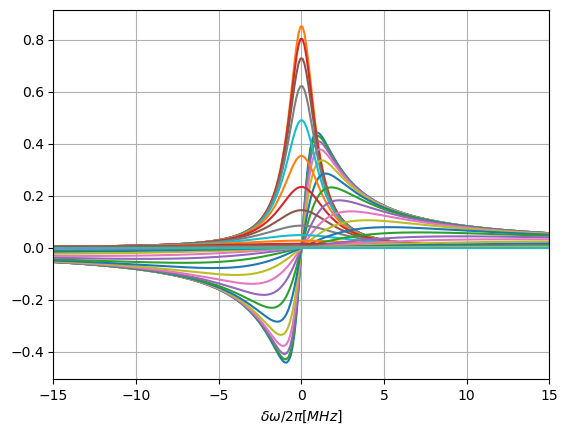

In [5]:
for powerdbm in powersweep:
    powerwatts = 1e-3*10**(powerdbm/10)
    omegasquared = p2omega2*powerwatts
    r0 = 0.92
    r = r0*(1 + 1j*deltaf*2*np.pi/Gamma2)/(1 + (deltaf*2*np.pi/Gamma2)**2 + omegasquared/(Gamma1*Gamma2))
    plt.plot(deltaf/1e6,np.imag(r),deltaf/1e6,np.real(r))
plt.xlim((-15,15))
plt.xlabel('$\delta\omega/2\pi [MHz]$')
plt.grid()

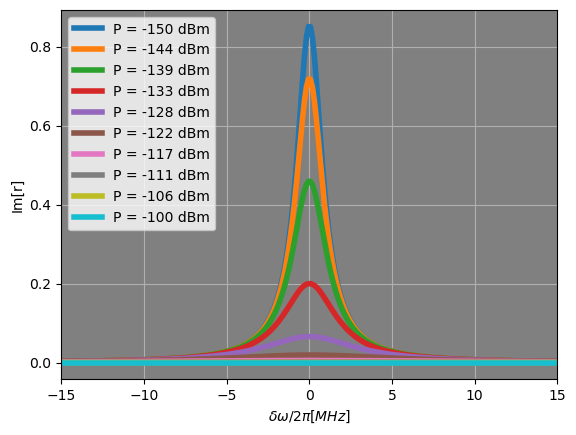

In [61]:
powersweep = np.linspace(-150,-100,10)
legendlist = []
for powerdbm in powersweep:
    powerwatts = 1e-3*10**(powerdbm/10)
    omegasquared = p2omega2*powerwatts
    r0 = 0.92
    r = r0*(1 + 1j*deltaf*2*np.pi/Gamma2)/(1 + (deltaf*2*np.pi/Gamma2)**2 + omegasquared/(Gamma1*Gamma2))
    plt.plot(deltaf/1e6,np.real(r), linewidth=4)
    legendlist.append('P = ' + str(int(np.round(powerdbm))) + " dBm")
    
plt.xlim((-15,15))
plt.legend(legendlist,loc='upper left')
plt.gca().set_facecolor("#808080")
plt.xlabel('$\delta\omega/2\pi [MHz]$')
plt.ylabel('Im[r]')
plt.grid()

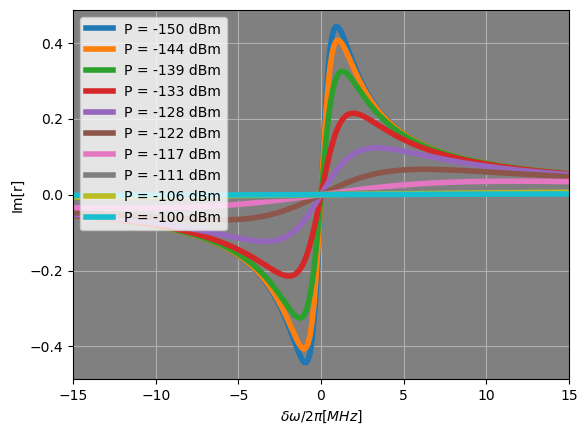

In [60]:
powersweep = np.linspace(-150,-100,10)
legendlist = []
for powerdbm in powersweep:
    powerwatts = 1e-3*10**(powerdbm/10)
    omegasquared = p2omega2*powerwatts
    r0 = 0.92
    r = r0*(1 + 1j*deltaf*2*np.pi/Gamma2)/(1 + (deltaf*2*np.pi/Gamma2)**2 + omegasquared/(Gamma1*Gamma2))
    plt.plot(deltaf/1e6,np.imag(r), linewidth=4)
    legendlist.append('P = ' + str(int(np.round(powerdbm))) + " dBm")
    
plt.xlim((-15,15))
plt.legend(legendlist,loc='upper left')
plt.gca().set_facecolor("#808080")
plt.xlabel('$\delta\omega/2\pi [MHz]$')
plt.ylabel('Im[r]')
plt.grid()

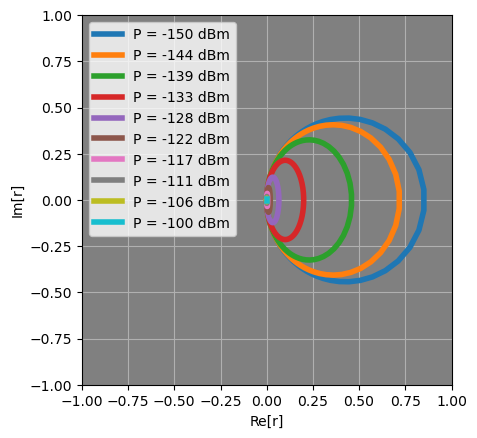

In [53]:
powersweep = np.linspace(-150,-100,10)
legendlist = []
for powerdbm in powersweep:
    powerwatts = 1e-3*10**(powerdbm/10)
    omegasquared = p2omega2*powerwatts
    r0 = 0.92
    r = r0*(1 + 1j*deltaf*2*np.pi/Gamma2)/(1 + (deltaf*2*np.pi/Gamma2)**2 + omegasquared/(Gamma1*Gamma2))
    plt.plot(np.real(r),np.imag(r), linewidth=4)
    legendlist.append('P = ' + str(int(np.round(powerdbm))) + " dBm")
plt.grid()
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.xlabel('Re[r]')
plt.ylabel('Im[r]')
plt.legend(legendlist)
plt.gca().set_aspect('equal')
plt.gca().set_facecolor("#808080")
